In [4]:
import sys 
print(sys.version)

3.6.9 (default, Jul  3 2019, 15:36:16) 
[GCC 5.4.0 20160609]


## Imports

In [5]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from utils.data import Data

## Read Data

In [6]:
d = Data()

In [7]:
df = d.get300K_features()

set index
time to load 9.07


In [8]:
df.head()

,bilayer,monolayer1,monolayer2,IE,IE_error,IE_rel_error,C33,C33_error,C33_rel_err,Atom_EA_Min,...,Atom_Mult_ThermalCond_YoungsModule_StDiv,Atom_Ratio_Density_TDebye0_Min,Atom_Ratio_ENARrev_YoungsModule_Min,Atom_Ratio_dHFus_SpeedSound_StDiv,EState_Topo_Ni_Zeff,EState_Topo_Pd_Zeff,EState_Topo_Te_dHAtom,Moment_SpeedSound_1,Moment_TCurie_1,SG187
uid,,,,,,,,,,,,,,,,,,,,,
Hf3Te2_Mo1S2-T1,Hf3Te2_Mo1S2-T1,Hf3Te2,Mo1S2-T1,-0.698046,0.081306,0.058239,36.954759,6.369837,0.086184,0.05468,...,0.01030,0.34662,0.13349,0.03793,0.0,0.0,197.0,0.78230,0.0,0
Hf3Te2_W1S2-T1,W1S2-T1_Hf3Te2,W1S2-T1,Hf3Te2,-0.677167,0.080142,0.059174,44.432743,7.523579,0.084663,0.05818,...,0.01030,0.48604,0.23500,0.03793,0.0,0.0,197.0,0.78230,0.0,0
Cr1S2-T1_Hf3Te2,Hf3Te2_Cr1S2-T1,Hf3Te2,Cr1S2-T1,-0.661212,0.074767,0.056538,54.217246,11.076879,0.102153,0.05106,...,0.01030,0.28118,0.13477,0.03793,0.0,0.0,197.0,2.43511,0.0,0
Ca2La2I10-T1_Ti2Ge2O6,Ti2Ge2O6_Ca2La2I10-T1,Ti2Ge2O6,Ca2La2I10-T1,-0.658413,0.117797,0.089456,49.623362,18.454026,0.185941,0.00526,...,0.02225,0.09343,0.02233,0.09867,0.0,0.0,0.0,-4.56952,0.0,0
Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1,Ta3Te1I7,-0.657006,0.083776,0.063756,28.505406,4.794372,0.084096,0.01765,...,0.07951,0.25418,0.14754,0.07947,0.0,0.0,197.0,-5.53334,0.0,0


### get descriptors column names 

In [9]:
feature_cols = d.getDescriptorsColumnNames()

In [10]:
feature_cols

0
1                      Atom_EA_Min
2            Atom_HardnessRB_StDiv
3                     Atom_IP8_Min
4      Atom_Inv_Diff_IP2_IP4_StDiv
5      Atom_Inv_Diff_IP5_IP6_StDiv
                  ...             
119            EState_Topo_Pd_Zeff
120          EState_Topo_Te_dHAtom
121            Moment_SpeedSound_1
122                Moment_TCurie_1
123                          SG187
Name: 1, Length: 121, dtype: object

## sampling bilayers

In [11]:
n = 50000
df_features = df.sample(n=n)

In [12]:
df_features.head()

,bilayer,monolayer1,monolayer2,IE,IE_error,IE_rel_error,C33,C33_error,C33_rel_err,Atom_EA_Min,...,Atom_Mult_ThermalCond_YoungsModule_StDiv,Atom_Ratio_Density_TDebye0_Min,Atom_Ratio_ENARrev_YoungsModule_Min,Atom_Ratio_dHFus_SpeedSound_StDiv,EState_Topo_Ni_Zeff,EState_Topo_Pd_Zeff,EState_Topo_Te_dHAtom,Moment_SpeedSound_1,Moment_TCurie_1,SG187
uid,,,,,,,,,,,,,,,,,,,,,
Nb3S1Br7_Sn2Sb2,Sn2Sb2_Nb3S1Br7,Sn2Sb2,Nb3S1Br7,-0.349753,0.035355,0.050543,27.527160,3.490459,0.063400,0.09855,...,0.01269,0.32669,0.06641,0.07003,0.0,0.0,0.00000,4.54560,0.00000,1
Ba1B2Se6_Co2Ni1O6,Ba1B2Se6_Co2Ni1O6,Ba1B2Se6,Co2Ni1O6,-0.368935,0.058415,0.079168,73.125057,12.435716,0.085030,0.04101,...,0.01708,0.10760,0.03114,0.10556,2.7,0.0,0.00000,-2.86357,0.54679,0
Ca2Co4Te6Cl4O16_P4,Ca2Co4Te6Cl4O16_P4,Ca2Co4Te6Cl4O16,P4,-0.285146,0.030487,0.053459,25.532052,7.720325,0.151189,0.03915,...,0.11913,0.03598,0.00651,0.21322,0.0,0.0,-355.50000,2.33434,2.33434,0
As4S2O12_U4Te10,As4S2O12_U4Te10,As4S2O12,U4Te10,-0.313413,0.048716,0.077719,51.179904,10.139743,0.099060,0.04593,...,0.03201,0.32620,0.73320,0.04489,0.0,0.0,-260.81143,3.28938,0.00000,0
Ge2Sb2Te5_Sr2Ti2Si4O14,Ge2Sb2Te5_Sr2Ti2Si4O14,Ge2Sb2Te5,Sr2Ti2Si4O14,-0.536187,0.081025,0.075557,90.692430,31.353257,0.172855,0.05581,...,0.03363,0.09505,0.08265,0.40245,0.0,0.0,161.00000,-1.98767,0.00000,0


In [13]:
df_features.shape

(50000, 130)

# UMAP

In [14]:
import umap
import numba

In [15]:
dir(umap)

['UMAP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'distances',
 'nndescent',
 'numba',
 'pkg_resources',
 'rp_tree',
 'sparse',
 'spectral',
 'umap_',
 'utils']

In [16]:
reducer = umap.UMAP(random_state=50)

In [17]:
embedding = reducer.fit_transform(df_features[feature_cols])

/home/mutaz/.local/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/mutaz/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.6/site-packages/umap/utils.py", line 409:
@numba.njit(par

In [18]:
embedding.shape

(50000, 2)

In [19]:
import sklearn

In [20]:
colors = sklearn.preprocessing.minmax_scale(df_features.IE)

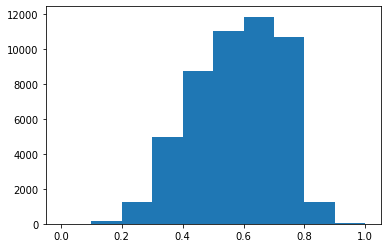

In [21]:
plt.hist(colors)
plt.show()

In [22]:
plot_df = pd.DataFrame(embedding,columns=['x','y'])

In [23]:
plot_df['c'] = sklearn.preprocessing.minmax_scale(df_features.IE)

In [24]:
plot_df.head()

,x,y,c
0,6.627745,6.362226,0.600407
1,-9.074962,-5.492719,0.562923
2,17.822432,-0.732153,0.726656
3,15.483387,-1.269498,0.671420
4,-2.268571,-9.097164,0.236095


In [25]:
plot_df = pd.DataFrame({
    'x': embedding[:, 0],
    'y': embedding[:, 1],
    'c': sklearn.preprocessing.minmax_scale(df_features.IE), 
    'IE': df_features.IE, 
    'C33': df_features.C33
})

In [26]:
plot_df.head()

,x,y,c,IE,C33
uid,,,,,
Nb3S1Br7_Sn2Sb2,6.627745,6.362226,0.600407,-0.349753,27.527160
Ba1B2Se6_Co2Ni1O6,-9.074962,-5.492719,0.562923,-0.368935,73.125057
Ca2Co4Te6Cl4O16_P4,17.822432,-0.732153,0.726656,-0.285146,25.532052
As4S2O12_U4Te10,15.483387,-1.269498,0.671420,-0.313413,51.179904
Ge2Sb2Te5_Sr2Ti2Si4O14,-2.268571,-9.097164,0.236095,-0.536187,90.692430


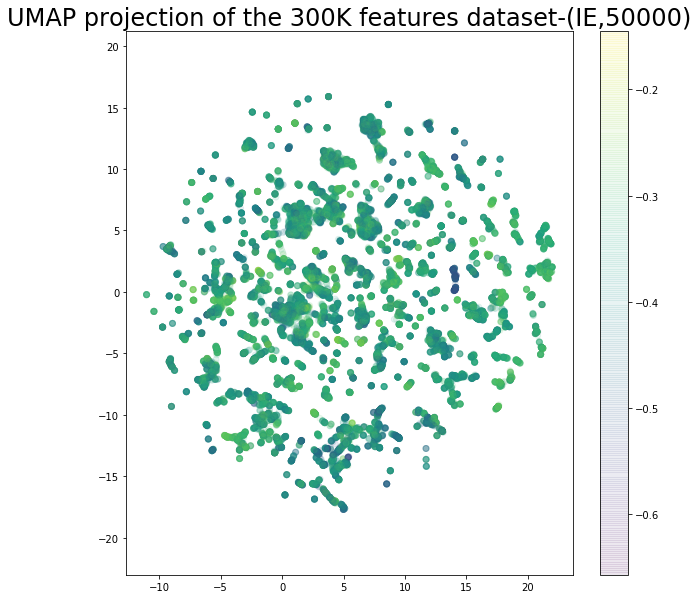

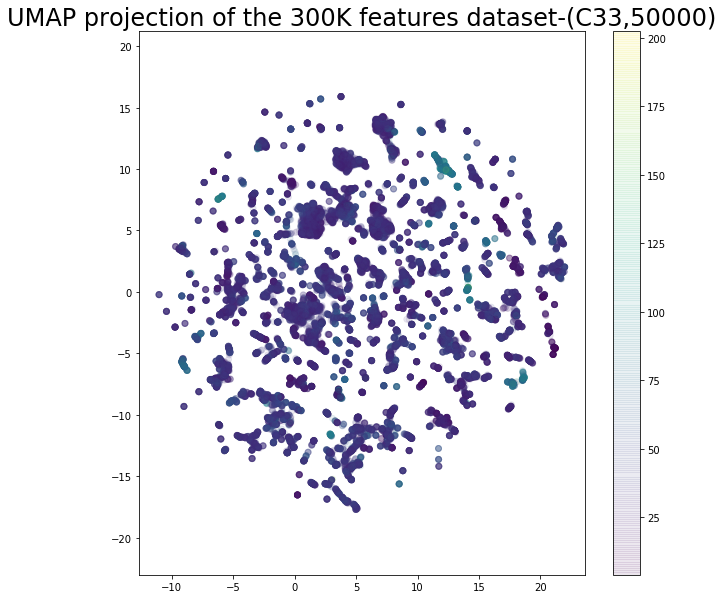

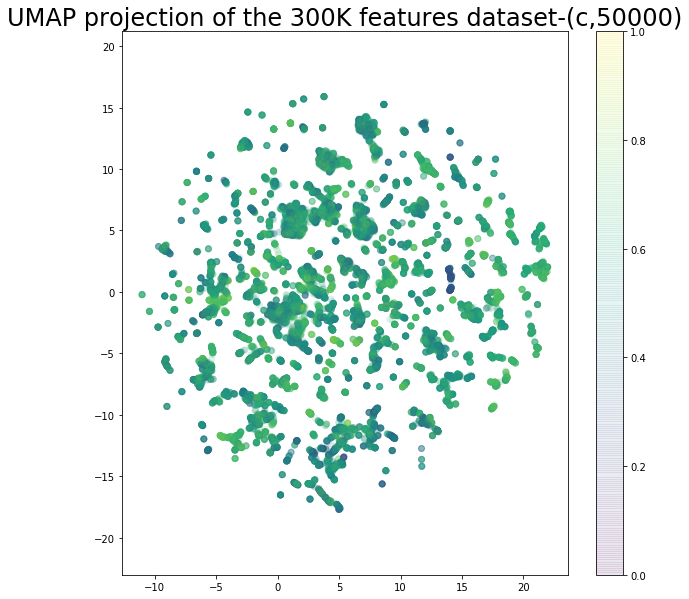

In [27]:
colorby = ['IE','C33','c']

for c in colorby: 
    plt.figure(figsize=(10, 10))
    plt.scatter(data=plot_df, x='x', y='y', c=c, alpha=.1)
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'UMAP projection of the 300K features dataset-({c},{n})', fontsize=24);
    plt.colorbar()
    plt.savefig(f'plots/300K_umap_{n}_samples_colorby_{c}.png', transparent=True)

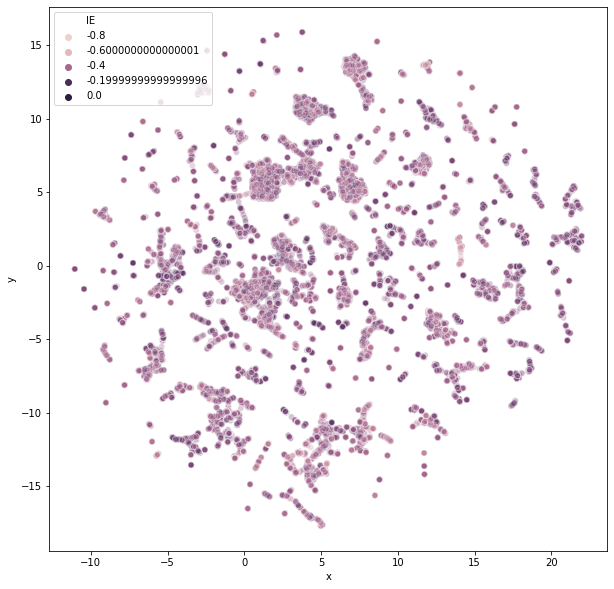

In [29]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='x', y='y',
    hue="IE",
   # palette=sns.color_palette("hls", 500),
    data=plot_df,
    alpha=0.3
)
plt.legend(loc='upper left')
plt.show()

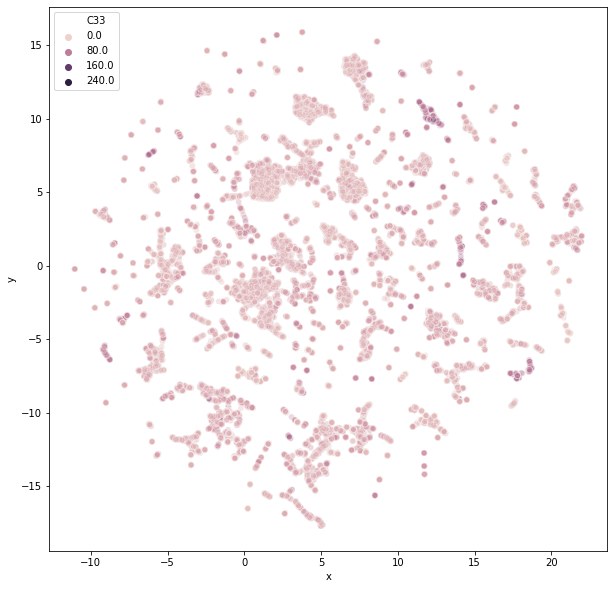

In [30]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='x', y='y',
    hue="C33",
   # palette=sns.color_palette("hls", 500),
    data=plot_df,
    alpha=0.3
)
plt.legend(loc='upper left')
plt.show()

maybe some contours 
https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_image.html#sphx-glr-gallery-images-contours-and-fields-contour-image-py

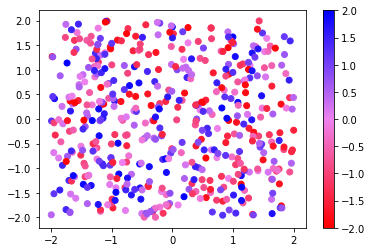

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

x,y,c = zip(*np.random.rand(500,3)*4-2)

norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","blue"])

plt.scatter(x,y,c=c, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

(array([0.25705062, 0.29737229, 0.25201041, 0.23184958, 0.23184958,
        0.23688979, 0.29737229, 0.1814475 , 0.28225166, 0.25201041]),
 array([-1.97830541, -1.58149641, -1.18468741, -0.78787841, -0.39106941,
         0.00573959,  0.40254859,  0.79935759,  1.19616659,  1.59297559,
         1.9897846 ]),
 <a list of 10 Patch objects>)

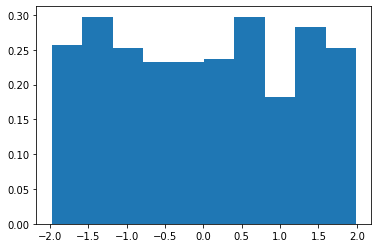

In [32]:
plt.hist(c, density=True)

In [33]:
len(c)

500

In [34]:
c = np.random.rand()